# Churn prediction model


In [2]:
# importing libraries
import os                                              # for performing input & output operations
os.environ["TF_CPP_MIN_LOG_LEVEL"]="5"
import pandas as pd                                    # for dataframe
import numpy as np                                     # for numerical operations
from fancyimpute import KNN                            # for knn imputations
from scipy.stats import chi2_contingency               # for scientific calculations
import matplotlib.pyplot as plt                        # for visualisations
import seaborn as sns                                  # for visualisatons
from random import randrange,uniform                   # to generate random number
from sklearn.model_selection import train_test_split   # for implementing stratified sampling
from sklearn import tree                               # for implementing decision tree algorithm in data
from sklearn.metrics import accuracy_score             # for implementing decision tree algorithm in data
from sklearn.metrics import confusion_matrix           # for calculating error metrics of various models
from sklearn.ensemble import RandomForestClassifier    # for implementing random forest model on data
import statsmodels.api as sn                           # for applying logistic model on data set
from sklearn.neighbors import KNeighborsClassifier     # for implementing knn model
from sklearn.naive_bayes import GaussianNB             # for implementing naive bayes
from sklearn import model_selection                    # for selecting model
import pickle                                          # for saving the final model

In [3]:
#set current working directory
os.chdir("C:/Users/admin/akansha")
os.getcwd()

'C:\\Users\\admin\\akansha'

In [4]:
# read data
data1=pd.read_csv("Test_data.csv")
data2=pd.read_csv("Train_data.csv")

In [5]:
# merge two datsets 
churn_data=pd.concat([data1,data2],axis=0)

In [6]:
# observing the whole dataset
#churn_data.shape
     churn_data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [7]:
print(churn_data.dtypes)

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object


##### MISSING VALUE ANALYSIS

In [8]:
#### Missing Value Analysis
churn_data.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [9]:
#Encoding Variable
#Assigning levels to the categories
lis = []
for i in range(0, churn_data.shape[1]):
    if(churn_data.iloc[:,i].dtypes == 'object'):
        churn_data.iloc[:,i] = pd.Categorical(churn_data.iloc[:,i])
        churn_data.iloc[:,i] = churn_data.iloc[:,i].cat.codes 
        churn_data.iloc[:,i] = churn_data.iloc[:,i].astype('object')
        lis.append(churn_data.columns[i])
        

In [10]:
churn_data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,11,101,510,1454,0,0,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,26,137,510,2813,0,0,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,35,103,408,4463,0,1,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,32,99,415,4827,0,0,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,40,108,415,4530,0,0,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0
5,12,117,415,2486,0,0,0,226.5,85,38.51,...,68,12.04,223.0,90,10.04,6.9,5,1.86,1,0
6,28,63,415,1116,0,1,32,218.9,124,37.21,...,125,18.22,260.3,120,11.71,12.9,3,3.48,1,0
7,18,94,408,1715,0,0,0,157.5,97,26.78,...,112,19.08,310.8,106,13.99,11.1,6,3.00,0,0
8,24,138,510,1384,0,0,0,89.1,117,15.15,...,46,10.78,190.5,71,8.57,9.9,4,2.67,2,0
9,43,128,415,3979,0,1,43,177.8,100,30.23,...,89,12.52,194.2,92,8.74,11.9,1,3.21,0,0


In [11]:
# checking statistical values of dataset
churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##### OUTLIER ANALYSIS

{'whiskers': [<matplotlib.lines.Line2D at 0x1ace7970cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ace797fef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ace7970b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1ace79f2668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ace79f2c88>],
 'means': []}

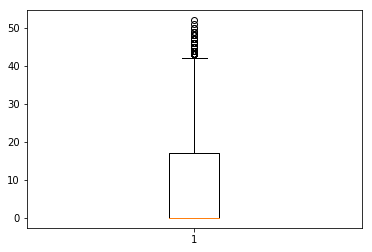

In [12]:
# Plot boxplot to visualise outliers
%matplotlib inline
plt.boxplot(churn_data['number vmail messages'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ace7aa7dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ace7ab0c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ace7aa76a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ace7ab76a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ace7ab7eb8>],
 'means': []}

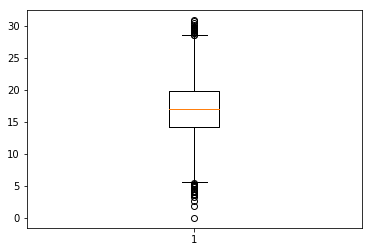

In [13]:
# Plot boxplot to visualise outliers
%matplotlib inline
plt.boxplot(churn_data['total eve charge'])

In [14]:
print(churn_data.dtypes)

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object


In [15]:
#save numeric names which are continuous
cnames=["account length","area code","number vmail messages","total day calls","total day minutes","total day charge"
        ,"total eve minutes","total eve calls","total eve charge","total night minutes","total night charge",
        "total night calls","total intl minutes","total intl calls","total intl charge","number customer service calls"]
cnames

['account length',
 'area code',
 'number vmail messages',
 'total day calls',
 'total day minutes',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night charge',
 'total night calls',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [16]:
## Detect and Delete outliers from data

#for i in cnames:
    #print(i)
    #q75,q25=np.percentile(churn_data.loc[:,i],[75,25])  # extract quartiles 
    #iqr=q75-q25                                         # calculate IQR
   
    #min=q25-(iqr*1.5)                                   
    #max=q75+(iqr*1.5)
    
    #print(min)
    #print(max)
    
    #data=churn_data.drop(churn_data[churn_data.loc[:,i]<min].index)
    #data=churn_data.drop(churn_data[churn_data.loc[:,i]>max].index)
    

In [17]:
# Detect outliers and replace with NA

for i in cnames:
    #print(i)
    q75,q25=np.percentile(churn_data.loc[:,i],[75,25])  # extract quartiles 
    iqr=q75-q25                                         # calculate IQR
   
    minimum=q25-(iqr*1.5)                                   # calculate inner and outer frames
    maximum=q75+(iqr*1.5)
    
    #print(minimum)
    #print(maximum)
    churn_data.loc[churn_data.loc[:,i] < minimum, i] = np.nan
    churn_data.loc[churn_data.loc[:,i] > maximum, i] = np.nan

    missing_value=pd.DataFrame(churn_data.isnull().sum())   # calculating missing values
    
    #churn_data=pd.DataFrame(KNN(k=3).fit_transform(churn_data),columns=churn_data.columns)  #performing knn imputation
    print(missing_value)
    

                                0
state                           0
account length                 24
area code                       0
phone number                    0
international plan              0
voice mail plan                 0
number vmail messages           0
total day minutes               0
total day calls                 0
total day charge                0
total eve minutes               0
total eve calls                 0
total eve charge                0
total night minutes             0
total night calls               0
total night charge              0
total intl minutes              0
total intl calls                0
total intl charge               0
number customer service calls   0
Churn                           0
                                  0
state                             0
account length                   24
area code                      1246
phone number                      0
international plan                0
voice mail plan                   0


In [18]:
# filling missing outlier values by mean method

churn_data['area code']=churn_data['area code'].fillna(churn_data['area code'].mean())
churn_data['account length']=churn_data['account length'].fillna(churn_data['account length'].mean())
churn_data['phone number']=churn_data['phone number'].fillna(churn_data['phone number'].mean())
churn_data['number vmail messages']=churn_data['number vmail messages'].fillna(churn_data['number vmail messages'].mean())
churn_data['total day minutes']=churn_data['total day minutes'].fillna(churn_data['total day minutes'].mean())
churn_data['total day calls']=churn_data['total day calls'].fillna(churn_data['total day calls'].mean())
churn_data['total day charge']=churn_data['total day charge'].fillna(churn_data['total day charge'].mean())
churn_data['total eve minutes']=churn_data['total eve minutes'].fillna(churn_data['total eve minutes'].mean())
churn_data['total eve calls']=churn_data['total eve calls'].fillna(churn_data['total eve calls'].mean())
churn_data['total eve charge']=churn_data['total eve charge'].fillna(churn_data['total eve charge'].mean())
churn_data['total night minutes']=churn_data['total night minutes'].fillna(churn_data['total night minutes'].mean())
churn_data['total night calls']=churn_data['total night calls'].fillna(churn_data['total night calls'].mean())
churn_data['total night charge']=churn_data['total night charge'].fillna(churn_data['total night charge'].mean())
churn_data['total intl minutes']=churn_data['total intl minutes'].fillna(churn_data['total intl minutes'].mean())
churn_data['total intl calls']=churn_data['total intl calls'].fillna(churn_data['total intl calls'].mean())
churn_data['total intl charge']=churn_data['total intl charge'].fillna(churn_data['total intl charge'].mean())
churn_data['number customer service calls']=churn_data['number customer service calls'].fillna(churn_data['number customer service calls'].mean())


In [19]:
churn_data.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [20]:
churn_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [21]:
churn_data.shape

(5000, 21)

##### FEATURE SELECTION

In [22]:
##Correlation analysis
#Correlation plot
df_corr = churn_data.loc[:,cnames]
df_corr

,account length,area code,number vmail messages,total day calls,total day minutes,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night charge,total night calls,total intl minutes,total intl calls,total intl charge,number customer service calls
0,101.0,412.652371,0.000000,123.0,70.9,12.05,211.9,73.000000,18.01,236.0,10.62,73.0,10.600000,3.000000,2.860000,3.000000
1,137.0,412.652371,0.000000,86.0,223.6,38.01,244.8,139.000000,20.81,94.2,4.24,81.0,9.500000,7.000000,2.570000,0.000000
2,103.0,408.000000,29.000000,95.0,294.7,50.10,237.3,105.000000,20.17,300.3,13.51,127.0,13.700000,6.000000,3.700000,1.000000
3,99.0,415.000000,0.000000,123.0,216.8,36.86,126.4,88.000000,10.74,220.6,9.93,82.0,15.700000,2.000000,4.240000,1.000000
4,108.0,415.000000,0.000000,78.0,197.4,33.56,124.0,101.000000,10.54,204.5,9.20,107.0,7.700000,4.000000,2.080000,2.000000
5,117.0,415.000000,0.000000,85.0,226.5,38.51,141.6,68.000000,12.04,223.0,10.04,90.0,6.900000,5.000000,1.860000,1.000000
6,63.0,415.000000,32.000000,124.0,218.9,37.21,214.3,125.000000,18.22,260.3,11.71,120.0,12.900000,3.000000,3.480000,1.000000
7,94.0,408.000000,0.000000,97.0,157.5,26.78,224.5,112.000000,19.08,310.8,13.99,106.0,11.100000,6.000000,3.000000,0.000000
8,138.0,412.652371,0.000000,117.0,89.1,15.15,126.8,100.234466,10.78,190.5,8.57,71.0,9.900000,4.000000,2.670000,2.000000
9,128.0,415.000000,7.297773,100.0,177.8,30.23,147.3,89.000000,12.52,194.2,8.74,92.0,11.900000,1.000000,3.210000,0.000000


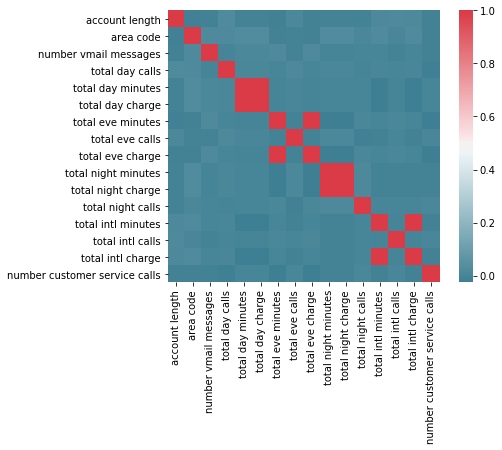

In [23]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [24]:
churn_data.dtypes

state                             object
account length                   float64
area code                        float64
phone number                       int64
international plan                object
voice mail plan                   object
number vmail messages            float64
total day minutes                float64
total day calls                  float64
total day charge                 float64
total eve minutes                float64
total eve calls                  float64
total eve charge                 float64
total night minutes              float64
total night calls                float64
total night charge               float64
total intl minutes               float64
total intl calls                 float64
total intl charge                float64
number customer service calls    float64
Churn                             object
dtype: object

In [25]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["state","phone number","international plan","voice mail plan"]
cat_names

['state', 'phone number', 'international plan', 'voice mail plan']

In [26]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(churn_data['Churn'], churn_data[i]))
    print(p)

state
7.850836224371827e-05
phone number
0.493350889587423
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


In [27]:
#removing variables which carry irrelevant information
churn_data = churn_data.drop(['phone number','area code','state'], axis=1)
churn_data.shape

(5000, 18)

##### FEATURE SCALING

In [28]:
df=churn_data.copy()


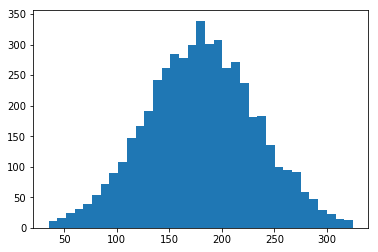

In [29]:
# Normality Check
%matplotlib inline
plt.hist(churn_data['total day minutes'],bins='auto')
# saving continuous variable to apply feature scaling
cnames=["account length","total day minutes","total day calls","total day charge","total eve minutes",
         "total eve calls","total eve charge","total night minutes","total night charge","total night calls",
         "total intl calls","total intl charge","total intl minutes","number customer service calls"]


(array([1023.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1786.,
           0.,    0.,  399.,    0.,    0.,    0.,    0.,    0., 1127.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  665.]),
 array([0.        , 0.11538462, 0.23076923, 0.34615385, 0.46153846,
        0.57692308, 0.69230769, 0.80769231, 0.92307692, 1.03846154,
        1.15384615, 1.26923077, 1.38461538, 1.5       , 1.61538462,
        1.73076923, 1.84615385, 1.96153846, 2.07692308, 2.19230769,
        2.30769231, 2.42307692, 2.53846154, 2.65384615, 2.76923077,
        2.88461538, 3.        ]),
 <a list of 26 Patch objects>)

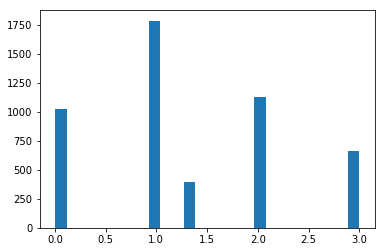

In [30]:
plt.hist(churn_data['number customer service calls'], bins='auto')

##### Standardisation 

In [31]:
# as the data is normally distributed so we will go for standardisation rather than normalisation

# Normalisation
#  For i in cnames:
#        print(i)
#        data[i]=(data[i]-np.min(data[i]))/(np.max(data[i])-np.min(data[i]))

In [32]:
# standardisation

for i in cnames:
    print(i)
    churn_data[i] = (churn_data[i] - churn_data[i].mean())/churn_data[i].std()

account length
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night charge
total night calls
total intl calls
total intl charge
total intl minutes
number customer service calls


In [33]:
churn_data.head(10)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,0.034066,0,0,0.000000,-2.093579,1.192145,-2.093993,0.230678,-1.411350e+00,0.229526,0.731113,-1.401798,0.731060,0.119216,-0.599690,0.115567,1.807186,0
1,0.961919,0,0,0.000000,0.828095,-0.740342,0.827814,0.907952,2.008915e+00,0.907127,-2.184544,-0.983749,-2.184135,-0.312420,1.346587,-0.305939,-1.404012,0
2,0.085614,0,1,29.000000,2.188482,-0.270278,2.188547,0.753558,2.469604e-01,0.752247,2.053233,1.420036,2.051580,1.335643,0.860018,1.336481,-0.333613,0
3,-0.017481,0,0,0.000000,0.697988,1.192145,0.698381,-1.529412,-6.340169e-01,-1.529818,0.414462,-0.931493,0.415781,2.120435,-1.086260,2.121355,-0.333613,0
4,0.214482,0,0,0.000000,0.326799,-1.158177,0.326965,-1.578818,3.967165e-02,-1.578218,0.083417,0.374912,0.082224,-1.018732,-0.113121,-1.018140,0.736786,0
5,0.446445,0,0,0.000000,0.883582,-0.792572,0.884089,-1.216507,-1.670461e+00,-1.215218,0.463810,-0.513443,0.466043,-1.332649,0.373448,-1.337903,-0.333613,0
6,-0.945333,0,1,32.000000,0.738168,1.244374,0.737773,0.280084,1.283404e+00,0.280346,1.230763,1.054242,1.229111,1.021726,-0.599690,1.016718,-0.333613,0
7,-0.146350,0,0,0.000000,-0.436624,-0.165819,-0.436127,0.490059,6.097158e-01,0.488466,2.269132,0.322656,2.270905,0.315414,0.860018,0.319053,-1.404012,0
8,0.987692,0,0,0.000000,-1.745351,0.878768,-1.745087,-1.521178,-2.209313e-15,-1.520138,-0.204447,-1.506311,-0.205640,-0.155461,-0.113121,-0.160592,0.736786,0
9,0.729955,0,1,7.297773,-0.048216,-0.009131,-0.047828,-1.099168,-5.821947e-01,-1.099057,-0.128369,-0.408931,-0.127963,0.629330,-1.572829,0.624281,-1.404012,0


##### SAMPLING TECHNIQUES

In [34]:
# checking data imbalance issue
churn_data['Churn'].value_counts()

0    4293
1     707
Name: Churn, dtype: int64

In [35]:
# from given data 85% are not going to churn and rest 14.14% are going to churn or leave the company

In [36]:
## simple random sampling
    #sim_sampling=churn_data.sample(500)
    #sim_sampling.head(10)

In [40]:
## systematic sampling
#k=int(round(len(churn_data)/2500))                    #calculate kth value
#randnum=randrange(0,5)              #generate a random number using simple random sampling
#sys_sampling=churn_data.iloc[randnum::k,:] #select kth observation starting from randnum
#sys_sampling.head(10)

In [41]:
# stratified sampling  -- this will be used in model
#y=churn_data['voice mail plan']  # select a categorical variable
#rest,sample=train_test_split(churn_data,test_size=0.6,stratify=y)
#sample.head(10)


## MODEL DEVELOPMENT

##### DECISION TREE

In [37]:
# replace target variable churn with yes or no
churn_data['Churn'] = churn_data['Churn'].replace(0, 'No')
churn_data['Churn'] = churn_data['Churn'].replace(1, 'Yes')

In [38]:
# to handle data imbalance issue we are dividing our dataset on basis of stratified sampling

In [39]:
# divide data into train and test
X=churn_data.values[:,0:17]
Y=churn_data.values[:,17]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [40]:
type(X_train)

numpy.ndarray

In [41]:
# Decision tree - we will build the model on train data and test it on test data
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
# predict new test cases
C50_Predictions = C50_model.predict(X_test) # applying decision tree model on test data set
C50_Predictions

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No',

In [42]:
data1=churn_data.drop(['Churn'],axis=1)

In [43]:
#Create dot file to visualise tree  #http://webgraphviz.com/
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(C50_model, out_file=dotfile,feature_names=data1.columns)

In [44]:
# Cofusion matrix of decisio tree
CM = pd.crosstab(y_test, C50_Predictions)
CM

col_0,No,Yes
row_0,,
No,817,42
Yes,38,103


In [45]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [46]:
#check accuracy of model
accuracy=((TP+TN)*100)/(TP+TN+FP+FN)
accuracy

92.0

In [47]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

26.95035460992908

In [48]:
# accuracy and fnr from decision tree are
# accuracy=92.0%
# fnr=26.95%

##### RANDOM FOREST

In [55]:
# Random forest model
RF_model = RandomForestClassifier(n_estimators = 13).fit(X_train, y_train)
RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
# Apply RF on test data to check accuracy
RF_Predictions = RF_model.predict(X_test)
RF_Predictions

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No',

In [57]:
# To evaluate performance of any classification model we built confusion metrics
CM =pd.crosstab(y_test, RF_Predictions)
CM

col_0,No,Yes
row_0,,
No,848,11
Yes,45,96


In [58]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [59]:
#check accuracy of model
accuracy=((TP+TN)*100)/(TP+TN+FP+FN)
accuracy

94.4

In [60]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

31.914893617021278

In [61]:

# accuracy and fnr from random forest are
# accuracy=94.4%
# fnr=31.9%

#####  LOGISTIC REGRESSION

In [62]:
# Let us prepare data for Logistic Regression
# Replace target variable with yes or no to 1 and 0
churn_data['Churn']=churn_data['Churn'].replace('No',0)
churn_data['Churn']=churn_data['Churn'].replace('Yes',1)

In [63]:
churn_data.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,0.034066,0,0,0.0,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,-1.401798,0.731060,0.119216,-0.599690,0.115567,1.807186,0
1,0.961919,0,0,0.0,0.828095,-0.740342,0.827814,0.907952,2.008915,0.907127,-2.184544,-0.983749,-2.184135,-0.312420,1.346587,-0.305939,-1.404012,0
2,0.085614,0,1,29.0,2.188482,-0.270278,2.188547,0.753558,0.246960,0.752247,2.053233,1.420036,2.051580,1.335643,0.860018,1.336481,-0.333613,0
3,-0.017481,0,0,0.0,0.697988,1.192145,0.698381,-1.529412,-0.634017,-1.529818,0.414462,-0.931493,0.415781,2.120435,-1.086260,2.121355,-0.333613,0
4,0.214482,0,0,0.0,0.326799,-1.158177,0.326965,-1.578818,0.039672,-1.578218,0.083417,0.374912,0.082224,-1.018732,-0.113121,-1.018140,0.736786,0


In [64]:
# Create another dataset for logistic regression model and save target variable first
churn_data_logit=pd.DataFrame(churn_data['Churn'])
churn_data_logit.shape

(5000, 1)

In [65]:
cnames

['account length',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night charge',
 'total night calls',
 'total intl calls',
 'total intl charge',
 'total intl minutes',
 'number customer service calls']

In [66]:
#Let us add more continuous variable to the existing data frame
churn_data_logit=churn_data_logit.join(churn_data[cnames])

In [67]:
churn_data_logit.head()

,Churn,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night charge,total night calls,total intl calls,total intl charge,total intl minutes,number customer service calls
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.599690,0.115567,0.119216,1.807186
0,0,0.729955,1.622132,0.513163,1.622419,-0.067817,-0.063973,-0.068135,0.910000,0.909262,-0.461187,-0.599690,-0.116988,-0.116222,-0.333613
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.599690,0.115567,0.119216,1.807186
0,0,0.729955,1.622132,0.513163,1.622419,-0.067817,-0.063973,-0.068135,0.910000,0.909262,-0.461187,-0.599690,-0.116988,-0.116222,-0.333613
1,0,0.961919,0.828095,-0.740342,0.827814,0.907952,2.008915,0.907127,-2.184544,-2.184135,-0.983749,1.346587,-0.305939,-0.312420,-1.404012


In [68]:
print(churn_data.dtypes)

account length                   float64
international plan                object
voice mail plan                   object
number vmail messages            float64
total day minutes                float64
total day calls                  float64
total day charge                 float64
total eve minutes                float64
total eve calls                  float64
total eve charge                 float64
total night minutes              float64
total night calls                float64
total night charge               float64
total intl minutes               float64
total intl calls                 float64
total intl charge                float64
number customer service calls    float64
Churn                              int64
dtype: object


In [69]:
# Small change that logistic regression need to perform analysis on categorical variables are
# Create dummies for categorical variables
cat_names=["international plan","voice mail plan"]
for i in cat_names:
    temp=pd.get_dummies(churn_data[i],prefix=i)
    churn_data_logit=churn_data_logit.join(temp)


In [70]:
churn_data_logit.head(5)

,Churn,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night charge,total night calls,total intl calls,total intl charge,total intl minutes,number customer service calls,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,1,0
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,0,1
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,1,0
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,0,1
0,0,0.729955,1.622132,0.513163,1.622419,-0.067817,-0.063973,-0.068135,0.910000,0.909262,-0.461187,-0.59969,-0.116988,-0.116222,-0.333613,1,0,1,0


In [71]:
churn_data_logit.shape

(28338, 19)

In [72]:
churn_data_logit.head(5)

,Churn,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night charge,total night calls,total intl calls,total intl charge,total intl minutes,number customer service calls,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,1,0
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,0,1
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,1,0
0,0,0.034066,-2.093579,1.192145,-2.093993,0.230678,-1.411350,0.229526,0.731113,0.731060,-1.401798,-0.59969,0.115567,0.119216,1.807186,1,0,0,1
0,0,0.729955,1.622132,0.513163,1.622419,-0.067817,-0.063973,-0.068135,0.910000,0.909262,-0.461187,-0.59969,-0.116988,-0.116222,-0.333613,1,0,1,0


In [73]:
# splitting data into train and test by 80-20% rule
sample_index=np.random.rand(len(churn_data_logit))<0.8
train=churn_data_logit[sample_index]
test=churn_data_logit[~sample_index]

In [74]:
train.shape

(22712, 19)

In [75]:
test.shape

(5626, 19)

In [76]:
# bulid model on train data
# select column indexes for independent variable
train_cols=train.columns[1:17]


In [77]:
# build logistic model on train data
logit=sn.Logit(train['Churn'],train[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.380576
         Iterations 11


In [78]:
# Summary
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                22712
Model:                          Logit   Df Residuals:                    22696
Method:                           MLE   Df Model:                           15
Date:                Thu, 07 Mar 2019   Pseudo R-squ.:                 0.03197
Time:                        11:58:38   Log-Likelihood:                -8643.6
converged:                       True   LL-Null:                       -8929.1
                                        LLR p-value:                5.102e-112
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                    0.0471      0.020      2.389      0.017       0.008       0.086
total day minutes                80.6953     61.531      1.311      0.190     -39.904     201.295
total day calls                   0.0072      0.020      0.361      0.718      -0.032       0.046
total day charge                -80.4477     61.531     -1.307      0.191    -201.047      40.152
total eve minutes               110.8568     28.598      3.876      0.000      54.805     166.909
total eve calls                  -0.0418      0.020     -2.088      0.037      -0.081      -0.003
total eve charge               -110.8473     28.621     -3.873      0.000    -166.943     -54.752
total night minutes               2.1725     15.160      0.143      0.886     -27.540      31.885
total night charge               -2.1107     15.160     -0.139      0.889     -31.823      27.602
total night calls                -0.0107      0.020     -0.539      0.590      -0.050       0.028
total intl calls                 -0.1061      0.020     -5.179      0.000      -0.146      -0.066
total intl charge                 6.7646      4.814      1.405      0.160      -2.670      16.200
total intl minutes               -6.6952      4.814     -1.391      0.164     -16.130       2.740
number customer service calls     0.0348      0.020      1.766      0.077      -0.004       0.073
international plan_0             -2.0970      0.028    -75.217      0.000      -2.152      -2.042
international plan_1             -1.0842      0.052    -20.829      0.000      -1.186      -0.982
=================================================================================================
"""

In [79]:
# Apply model on test data to look accuracy
test = test.copy()  
test['Actual_prob'] = logit.predict(test[train_cols])

test['Actual_Val'] = 1
test.loc[test.Actual_prob < 0.5, 'Actual_Val'] = 0



In [80]:
# Build confusion metrics
CM=pd.crosstab(test['Churn'],test['Actual_Val'])
CM

Actual_Val,0
Churn,
0,4908
1,718


In [81]:
#let us save TP, TN, FP, FN
#TN=CM.iloc[0,0]
#FP=CM.iloc[0,1]
#FN=CM.iloc[1,0]
#TP=CM.iloc[1,1]

In [82]:
#check accuracy of model
accuracy=((TP+TN)*100)/(TP+TN+FP+FN)
accuracy

94.4

In [83]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

31.914893617021278

In [146]:
# accuracy and fnr from logistic regression are
# accuracy=94%
# fnr=31.9%

##### KNN MODEL

In [84]:
# knn implementation
knn_model=KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)

In [85]:
# predict knn_predictions 
knn_predictions=knn_model.predict(X_test)

In [86]:
# build confusion metrics
CM=pd.crosstab(y_test,knn_predictions)
CM

col_0,No,Yes
row_0,,
No,859,0
Yes,113,28


In [87]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []
from sklearn import metrics
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.817, 0.873, 0.876, 0.875, 0.877, 0.877, 0.883, 0.88, 0.884, 0.881, 0.887, 0.882, 0.887, 0.883, 0.887, 0.885, 0.888, 0.883, 0.887, 0.881, 0.885, 0.88, 0.881, 0.879, 0.881]


In [88]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [89]:
#check accuracy of model
accuracy=((TP+TN)*100)/(TP+TN+FP+FN)
accuracy

88.7

In [90]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

80.1418439716312

In [94]:
# accuracy and fnr from knn model are
# accuracy=88.7%
# fnr=80.14%

##### NAIVE BAYES

In [91]:
# Naive Bayes implementation
NB_model=GaussianNB().fit(X_train,y_train)

In [92]:
# predict test cases 
NB_predictions=NB_model.predict(X_test)

In [93]:
# build confusion metrics
CM=pd.crosstab(y_test,NB_predictions)
CM

col_0,No,Yes
row_0,,
No,796,63
Yes,67,74


In [95]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [96]:
#check accuracy of model
accuracy=((TP+TN)*100)/(TP+TN+FP+FN)
accuracy

87.0

In [97]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

47.5177304964539

In [260]:
# accuracy and fnr from naive bayes are
# accuracy=87.0%
# fnr=47.51%

In [98]:
# saving the random forest model 
model_file='model.pkl'
pickle.dump(RF_model,open(model_file,'wb'))

In [99]:
#''reloading the model
# load the model from saved file
loaded_model= pickle.load(open(model_file,'rb'))